In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_image='D:/Documents/Capstone/Project -2/New Bangladeshi/BangladeshiCrops/BangladeshiCrops/Train'

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                vertical_flip=False)
training_set=train_datagen.flow_from_directory(train_image,
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=512)

Found 10554 images belonging to 14 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 zoom_range=0.2)

test_set=test_datagen.flow_from_directory('D:/Documents/Capstone/Project -2/New Bangladeshi/BangladeshiCrops/BangladeshiCrops/Test',
                                              target_size=(224,224),
                                              class_mode='categorical',
                                              batch_size=512)

Found 2470 images belonging to 14 classes.


In [5]:
base_model = tf.keras.applications.InceptionResNetV2(
                     include_top=False,
                     weights='imagenet',
                     input_shape=(224,224,3)
                     )
 
base_model.trainable=False
 
model = tf.keras.Sequential([
        base_model,  
        tf.keras.layers.BatchNormalization(renorm=True),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(14, activation='softmax')
    ])

In [6]:
# tf.keras.metrics.AUC(
#     num_thresholds=200,
#     curve="ROC",
#     summation_method="interpolation",
#     name=None,
#     dtype=None,
#     thresholds=None,
#     multi_label=False,
#     num_labels=None,
#     label_weights=None,
#     from_logits=False,
# )

In [7]:
# tf.keras.metrics.Precision(
#     thresholds=None, top_k=None, class_id=None, name=None, dtype=None
# )

In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 5, 5, 1536)       10752     
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                        

In [10]:
early = tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)

In [11]:
batch_size=1024
STEP_SIZE_TRAIN = training_set.n//training_set.batch_size
STEP_SIZE_VALID = test_set.n//test_set.batch_size

# fit model
history = model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_set,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=8,
                    callbacks=[early])

Epoch 1/8
20/20 [==============================] - 962s 48s/step - loss: 1.0009 - accuracy: 0.6640 - auc: 0.9615 - precision: 0.8184 - recall: 0.5044 - true_positives: 5065.0000 - val_loss: 0.6146 - val_accuracy: 0.7627 - val_auc: 0.9841 - val_precision: 0.8123 - val_recall: 0.7163 - val_true_positives: 1467.0000
Epoch 2/8
20/20 [==============================] - 940s 47s/step - loss: 0.4118 - accuracy: 0.8447 - auc: 0.9931 - precision: 0.8715 - recall: 0.8068 - true_positives: 8102.0000 - val_loss: 0.4991 - val_accuracy: 0.8145 - val_auc: 0.9887 - val_precision: 0.8479 - val_recall: 0.7783 - val_true_positives: 1594.0000
Epoch 3/8
20/20 [==============================] - 955s 48s/step - loss: 0.3263 - accuracy: 0.8771 - auc: 0.9955 - precision: 0.8982 - recall: 0.8519 - true_positives: 8555.0000 - val_loss: 0.4781 - val_accuracy: 0.8237 - val_auc: 0.9892 - val_precision: 0.8610 - val_recall: 0.8047 - val_true_positives: 1648.0000
Epoch 4/8
20/20 [==============================] - 960s

In [12]:
# predictions = model.predict_generator(test_set, steps=STEP_SIZE_VALID)

In [13]:
# predicted_classes = np.argmax(predictions, axis=1)

In [14]:
# def predictor(test_set, test_steps):
#     y_pred= []
#     y_true=test_set.labels
#     classes=list(training_set.class_indices.keys())
#     class_count=len(classes)
#     errors=0
#     preds=model.predict(test_set, steps=test_steps, verbose=1)
#     tests=len(preds)
#     for i, p in enumerate(preds):
#             pred_index=np.argmax(p)         
#             true_index=test_set.labels[i]  # labels are integer values
#             if pred_index != true_index: # a misclassification has occurred                                           
#                 errors=errors + 1
#             y_pred.append(pred_index)
#     acc=( 1-errors/tests) * 100
#     print(f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}')
#     ypred=np.array(y_pred)
#     ytrue=np.array(y_true)
#     cm = confusion_matrix(ytrue, ypred)
#     # plot the confusion matrix
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
#     plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
#     plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.title("Confusion Matrix")
#     plt.show()
#     clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
#     print("Classification Report:\n----------------------\n", clr)
#     return errors, tests

# errors, tests=predictor(test_set, STEP_SIZE_VALID)

In [15]:
from matplotlib import pyplot

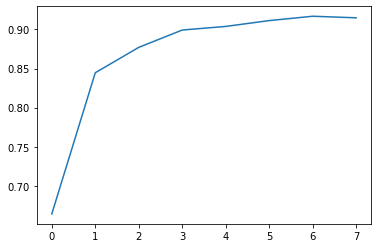

In [16]:
pyplot.plot(history.history['accuracy'])
pyplot.show()